In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
# from sklearn.cross_validation import cross_val_score

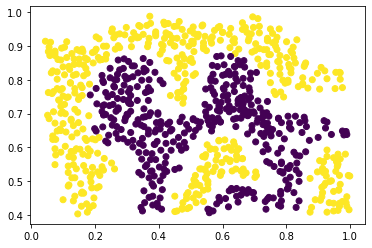

In [3]:
#数据集划分
data=loadmat('data1.mat')
X = data['X']
Y = data['y']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)
plt.scatter(X[:,0],X[:,1],c=Y.flatten())#可视化数据集

In [4]:
#定义基分类器
Base_classifier1 = DecisionTreeClassifier()
Base_classifier2 = AdaBoostClassifier()
Base_classifier3 = BernoulliNB()
Base_classifier4 = ExtraTreeClassifier()
Base_classifier5 = ExtraTreesClassifier()#作为基分类器，性能最好
Base_classifier6 = MultinomialNB()
Base_classifier7 = RandomForestClassifier()

In [5]:
#定义AdaBoost分类器
model = AdaBoostClassifier(
    base_estimator=Base_classifier1,#定义的基分类器
    n_estimators =50,#基分类器的个数 默认50
    learning_rate = 0.5,#学习率 默认为1
    algorithm='SAMME.R'
)
model.fit(X_train,y_train)
# print(cross_val_score(model, X_train, y_train, cv=4))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5)

验证集准确率： 0.9652509652509652


Text(0.5, 1.0, 'adaboost')

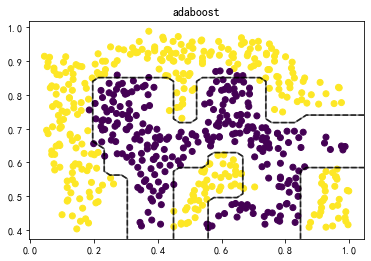

In [6]:
#计算准确度
# train_data = model.predict(X_train)
test_data = model.predict(X_test)
# print(accuracy_score(y_train,train_data))
print("验证集准确率：",accuracy_score(y_test,test_data))
#绘制决策边界
# 绘制分割超平面和样本集分类结果
plt.scatter(X_train[:,0], X_train[:,1], c=y_train.flatten()) # 散点图，根据 y值设置不同颜色
ax = plt.gca()  # 移动坐标轴
xlim = ax.get_xlim()  # 获得Axes的 x坐标范围
ylim = ax.get_ylim()  # 获得Axes的 y坐标范围
xx = np.linspace(xlim[0], xlim[1], 30)  # 创建等差数列，从 start 到 stop，共 num 个
yy = np.linspace(ylim[0], ylim[1], 30)  #
YY, XX = np.meshgrid(yy, xx)  # 生成网格点坐标矩阵 XUPT
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格矩阵展平后重构为数组
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和分隔
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("adaboost")

In [7]:
#随机森林
from sklearn.ensemble import RandomForestClassifier

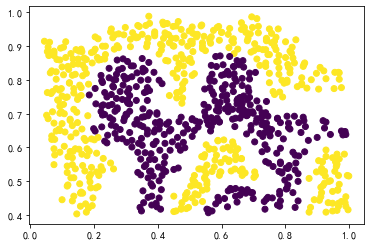

In [8]:
data1=loadmat('data1.mat')
X1 = data['X']
Y1 = data['y']
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.3,train_size=0.7,random_state=1)
plt.scatter(X1[:,0],X1[:,1],c=Y1.flatten())

In [9]:
#定义随机森林
# n_estimators : 随机森林中树的个数，即学习器的个数。 
# max_features : 划分叶子节点，选择的最大特征数目 
# n_features：在寻找最佳分割时要考虑的特征数量
# max_depth : 树的最大深度，如果选择default=None，树就一致扩展，
# 直到所有的叶子节点都是同一类样本，或者达到最小样本划分（min_samples_split）的数目。
# min_samples_split : 最小样本划分的数目，就是样本的数目少于等于这个值，就不能继续划分当前节点了
# criterion：分裂节点所用的标准，可选“gini”, “entropy”，默认“gini”。
model_random = RandomForestClassifier(n_estimators=5,random_state=2)
#训练数据
model_random.fit(X_train1,y_train1)

# print(model_random.estimators_)
print("随机森林的准确率为：",model_random.score(X_test1,y_test1))

随机森林的准确率为： 0.972972972972973


<ipython-input-9-228a0efdabd5>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random.fit(X_train1,y_train1)


In [1]:
list2=[]
n=[]
learn=0.3
for i in range(1,51):
    print("基分类器数目：%d"%i)
    model_random =RandomForestClassifier(n_estimators=i,max_depth=10,criterion = 'entropy',min_samples_split=2)#entropy
    model_random.fit(X_train1,y_train1)
    q1=model_random.score(X_test1,y_test1)
    list2.append(q1) 
    n.append(i)
    print("测试集上的精度为：%f"%q1)#求出其测试集上的精度
    
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.legend(['随机森林'])
plt.xlabel('基分类器数目-criterion=entropy')
plt.ylabel('准确度')
plt.title(' 学习率为0.3时，n_estimators=50,max_depth=10,criterion=entropy,min_samples_split=2')
plt.plot(n,list2)
plt.show()

基分类器数目：1


NameError: name 'RandomForestClassifier' is not defined

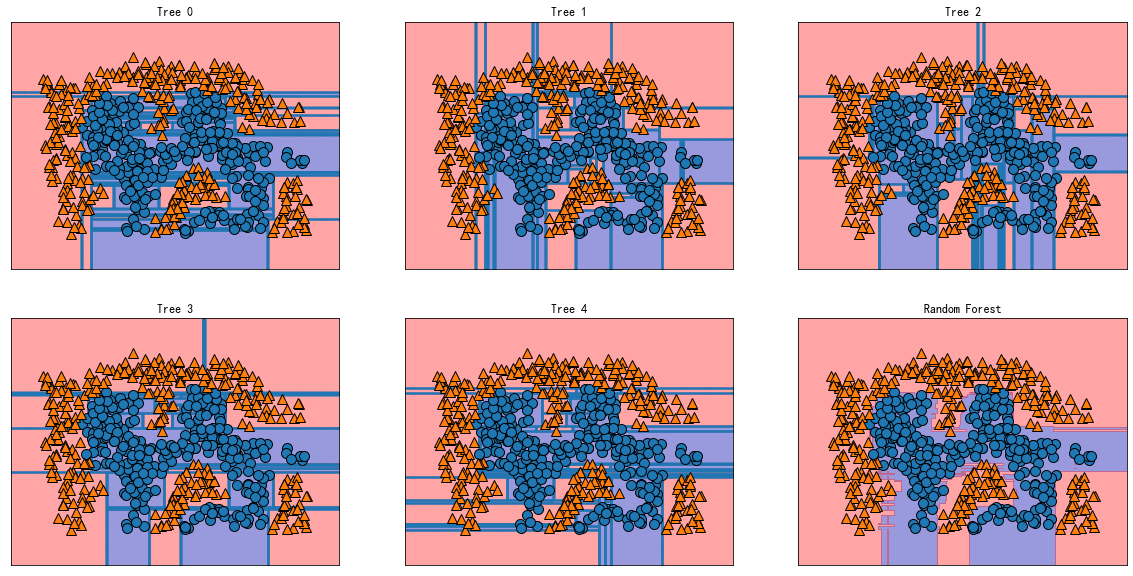

In [116]:
# #将每颗树学到的决策边界可视化，也将它们的总预测(即整个森林的预测)可视化
# #生成 2 行 3 列的6个子图，子图的大小为20*10
# fig,axes = plt.subplots(2, 3, figsize=(20, 10))
# # zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
# #如果各个迭代器的元素个数不一致，则返回列表长度与最短的对象相同，利用 * 号操作符，可以将元组解压为列表。
# #参数 axes.ravel()表示 6 个画布, forest.estimators_表示 5 个森林, enumerate()方法，输出每个元素的下标和其对应的值
# for i,(ax,tree) in enumerate(zip(axes.ravel(), model_random.estimators_)):
#     ax.set_title('Tree {}'.format(i))     #设置图形标题
#     #画出树的部分图，数据为训练集，树为随机森林生成的子树，画在ax子图中
#     mglearn.plots.plot_tree_partition(X_train1, y_train1.flatten(), tree, ax=ax)

# #画出随机森林的分界线
# mglearn.plots.plot_2d_separator(model_random, X_train1, fill=True, ax=axes[-1, -1], alpha=.4)

# #设置标题
# axes[-1, -1].set_title('Random Forest')
# mglearn.discrete_scatter(X_train1[:, 0], X_train1[:, 1], y_train1.flatten())         #添加数据点, 横坐标，纵坐标，结果


In [107]:
# 使用Iris数据集分别对adaboost和随机森林进行训练。
from sklearn.datasets import load_iris
X2,y2 = load_iris(return_X_y=True,as_frame=True)
# X2.head()
# import pandas as pd
# pd.plotting.scatter_matrix(X2,figsize=(8,8))
# print(y2)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.3,train_size=0.7,random_state=1)

In [112]:
# Iris数据集训练adaboost
model.fit(X_train2,y_train2)
# print(model.score(X_train2,y_train2))
print(model.score(X_test2,y_test2))

0.9555555555555556


In [111]:
# Iris数据集训练随机森林
model_random.fit(X_train2,y_train2)
# print(model_random.score(X_train2,y_train2))
print(model_random.score(X_test2,y_test2))

0.9555555555555556


Text(0, 0.5, '基分类器的数量')

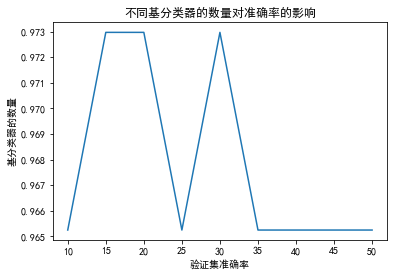

In [62]:
x222 = [10,15,20,25,30,35,40,45,50]
y222 = [0.9652509652509652,0.972972972972973,0.972972972972973,0.9652509652509652,0.972972972972973,0.9652509652509652,0.9652509652509652,0.9652509652509652,0.9652509652509652]
plt.plot(x222,y222)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("不同基分类器的数量对准确率的影响")
plt.xlabel('验证集准确率')
plt.ylabel('基分类器的数量')

IndentationError: expected an indented block (<ipython-input-100-423fd6b0b224>, line 49)